In [1]:
import pandas as pd
import numpy as np

In [3]:
plot_data = pd.read_excel("/content/Plot (1).xlsx")
plot_data.head()

,X,Y
0,190,8.001296
1,191,9.903781
2,192,12.486976
3,193,14.808269
4,194,14.616501


In [6]:
X = plot_data.drop(columns = "Y", axis = 1)
Y = plot_data["Y"]

In [7]:
print(X)
print(Y)

         X
0      190
1      191
2      192
3      193
4      194
...    ...
2306  2496
2307  2497
2308  2498
2309  2499
2310  2500

[2311 rows x 1 columns]
0        8.001296
1        9.903781
2       12.486976
3       14.808269
4       14.616501
          ...    
2306    64.907333
2307    65.241524
2308    65.523911
2309    65.012863
2310    64.636787
Name: Y, Length: 2311, dtype: float64


**Visualize the Plot dataset. You have to create a 2-D plot of the data. Take data in X column as X axis and data in Y column as Y axis. Attach the plot and Python Script for the same.**

Data is only plotted on the x and y axes in a 2D graphic. If you are a numerical analyst, it is crucial to understand how to plot such Matplotlib charts as they are frequently used in reporting and infographics.

Matplotlib Line Plot

In [4]:
import matplotlib.pyplot as plt

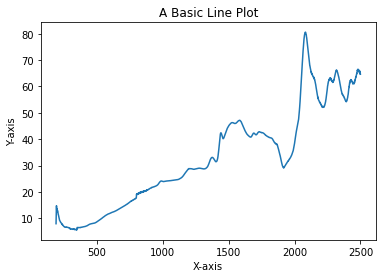

In [8]:
%matplotlib inline 

# plot() is used for plotting a line plot
plt.plot(X, Y)

# Adding title, xlabel and ylabel
plt.title('A Basic Line Plot') # Title of the plot
plt.xlabel('X-axis') # X-Label
plt.ylabel('Y-axis') # Y-Label

# show() is used for displaying the plot
plt.show()

In [9]:
plot_data.head()

,X,Y
0,190,8.001296
1,191,9.903781
2,192,12.486976
3,193,14.808269
4,194,14.616501


In [10]:
plot_data.set_index("X", inplace = True)

In [12]:
plot_data.head()

,Y
X,
190,8.001296
191,9.903781
192,12.486976
193,14.808269
194,14.616501


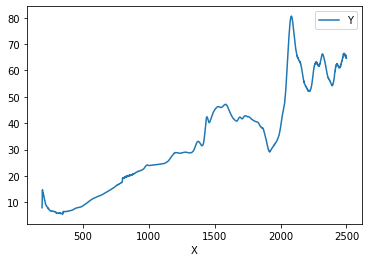

In [13]:
plot_data.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller


In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(plot_data['Y'])

ADF Statistics: -1.2066570260730114
p- value: 0.6707254913781571
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
## Use Techniques Differencing
plot_data['Y First Difference']=plot_data['Y']-plot_data['Y'].shift(1)

In [23]:
plot_data.drop(columns = "Passengers First Difference", axis =1, inplace = True)

In [24]:
plot_data.head()

,Y,Y First Difference
X,,
190,8.001296,NaN
191,9.903781,1.902485
192,12.486976,2.583195
193,14.808269,2.321293
194,14.616501,-0.191768


In [25]:
adf_test(plot_data['Y First Difference'].dropna())

ADF Statistics: -5.728873560778847
p- value: 6.671878766774986e-07
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Here, we make a graph of various types, but one attractive method is to determine whether or not the data is stationary. As a result, based on my research, we will first examine the time series data, also known as the ARIMA model. We make predictions about the current price based on the prior one using this approach.

suppose we want to predict the onion sales price in october month so first we gather the dataset after that analizing the data wheather the data is stationary or not if data is not stationary so first we calculate the differencing. with the help of differencing we make a hypothesis testing based on P value and null and Alternative hypothesis testing. Data is stationary so we have two conditions :
1 - Mean should be constatnt.
2 - Standard deviation should be constant.

So here our data is seasonal data.